In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as m
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

hello
hello
hello
   ID  Q_Age  Q_Gender  Q_City  Q1  Q4  Q7  Q13_1  Q13_2  Q13_3  ...  Q27_5  \
0  18     71         1       4   2   3   3      1      1      0  ...      0   
1  23     65         2       5   1   1   2      1      0      0  ...      0   
2  30     77         1       4   1   1   2      0      0      1  ...      0   
3  31     75         1       4   2   3   3      0      0      1  ...      0   
4  34     73         2       4   1   2   2      1      0      0  ...      0   

   Q27_6  Q27_7  Q27_8  Q27_9  Q27_10  Q28  Q29  Q32  Price_elasticity  
0      0      0      0      0       0    4    2    3          0.299965  
1      0      0      0      0       0    1    2    1          0.039880  
2      0      1      0      0       0    4    2    1         -0.120003  
3      0      1      0      0       0    4    2    2          0.032044  
4      0      1      0      0       0    4    2    6          0.163676  

[5 rows x 42 columns]
(1136, 42)
Index(['ID', 'Q_Age', 'Q_Gender', '

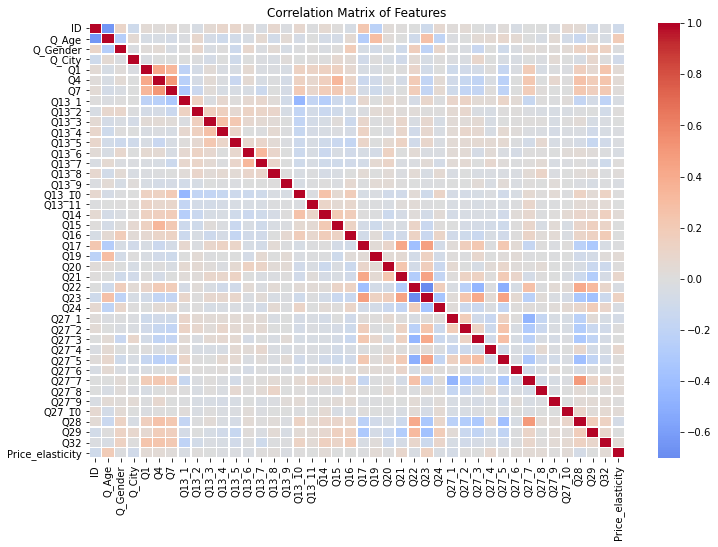

Top 20 correlating feature pairs (|r| < 1):
Feature1 Feature2  Correlation
     Q23      Q22    -0.700303
   Q_Age       ID    -0.640694
      Q7       Q4     0.514710
   Q27_5      Q22    -0.498461
     Q28    Q27_7     0.494290
   Q27_7    Q27_1    -0.467332
     Q23      Q17     0.465333
   Q27_3      Q22    -0.453587
     Q23      Q21     0.447126
  Q13_10    Q13_1    -0.445271
   Q27_5      Q23     0.443799
     Q21      Q17     0.425628
      Q4       Q1     0.418065
     Q28      Q22     0.407228
   Q27_3      Q23     0.406247
     Q22      Q17    -0.387714
     Q28    Q27_5    -0.385802
     Q29      Q23    -0.373753
     Q24      Q23    -0.346694
      Q7       Q1     0.338951
Counts of each class:
0.0    449
1.0    395
Name: is_price_responsive, dtype: int64
Features (X): ['Q_Age', 'Q_Gender', 'Q_City', 'Q1', 'Q4', 'Q7', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q14', 'Q15', 'Q16', 'Q17', 'Q19', 'Q20', 'Q21', 'Q22', 

In [6]:
print('hello')
print('hello')
print('hello')
df = pd.read_csv('survey_PE.csv')

print(df.head())
print(df.shape)

print(df.columns)

#-------------------------------------------------------CORRELATION MATRIX------------------------------------------------------

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=False, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

upper_triangle = np.triu(np.ones_like(corr_matrix, dtype=bool))

high_corr_pairs = (corr_matrix.where(~upper_triangle)
                  .stack()
                  .reset_index()
                  .rename(columns={'level_0':'Feature1', 'level_1':'Feature2', 0:'Correlation'}))

high_corr_pairs = (high_corr_pairs[abs(high_corr_pairs['Correlation']) < 1]
                  .sort_values(by='Correlation', key=abs, ascending=False))

top_n = 20
print(f"Top {top_n} correlating feature pairs (|r| < 1):")
print(high_corr_pairs.head(top_n).to_string(index=False))

#-------------------------------------------------------MAKE TO CLASSIFICATION PROBLEM----------------------------------------------------

threshold = 0.034
treshold2 = 0.032

df['is_price_responsive'] = df['Price_elasticity'].apply(
    lambda x: 1 if x < -threshold else (0 if x > treshold2 else None)
)

df = df.dropna(subset=['is_price_responsive'])

counts = df['is_price_responsive'].value_counts()
print("Counts of each class:")
print(counts)


X = df.drop(columns=["is_price_responsive", "Price_elasticity", 'ID'])
y = df['is_price_responsive']

print("Features (X):", list(X.columns)) 

print("Target (y):", y.name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 40)

#-------------------------------------------------- Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


#-------------------------------------------------- Calculate VIF for each feature
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = X_train.columns
vif_data1["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data1.sort_values("VIF", ascending=False))




Accuracy: 0.6521436040432207
['Q_Age', 'Q13_2', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_10', 'Q27_4', 'Q27_10']


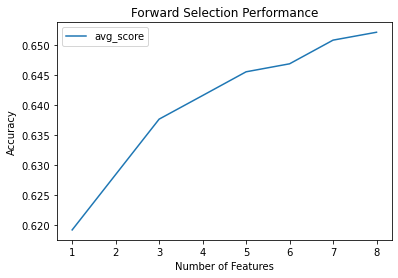

Top 20 Features with TRUE Fisher Scores:
     Feature  Fisher_Score  Percentile
0      Q_Age      0.057940       100.0
2     Q_City      0.015365        98.0
30     Q27_4      0.013035        95.0
25       Q23      0.009858        92.0
21       Q19      0.007287        90.0
33     Q27_7      0.006645        88.0
20       Q17      0.005705        85.0
27     Q27_1      0.005265        82.0
12     Q13_7      0.003337        80.0
4         Q4      0.003154        78.0
1   Q_Gender      0.002184        75.0
14     Q13_9      0.002024        72.0
23       Q21      0.001963        70.0
6      Q13_1      0.001466        68.0
36    Q27_10      0.001142        65.0
9      Q13_4      0.001115        62.0
29     Q27_3      0.001042        60.0
8      Q13_3      0.000962        57.0
35     Q27_9      0.000822        55.0
37       Q28      0.000753        52.0
Significant Features by Chi-Squared Test (p < 0.05):
   Feature  Chi2_Score       p_value
0    Q_Age   41.610882  1.113716e-10
30   Q27_4   

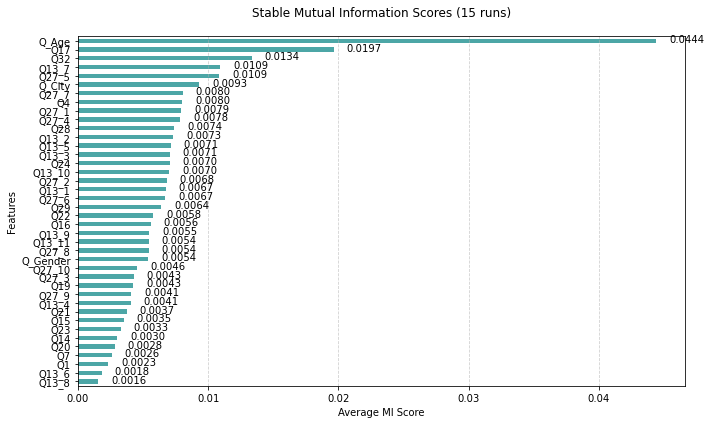

<Figure size 864x576 with 0 Axes>

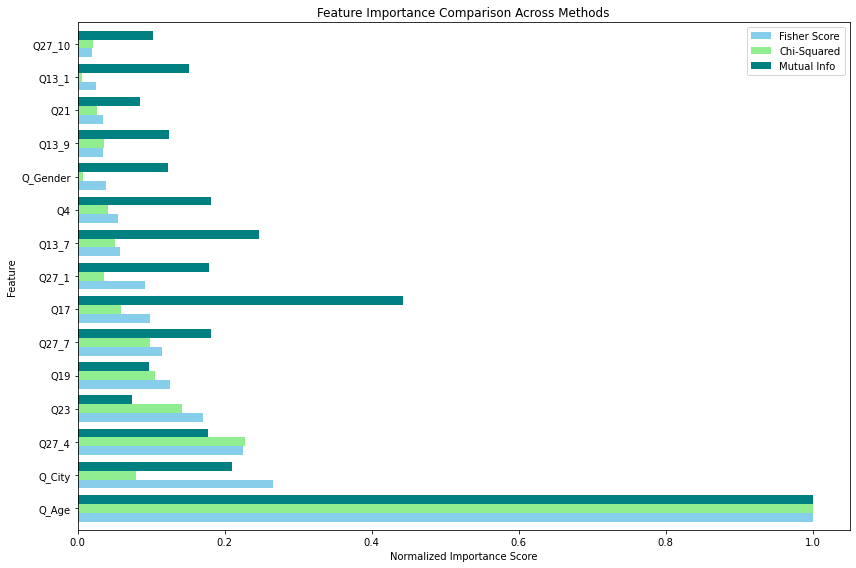


Top 20 Features by Stable Mutual Information:
   Feature  IG_Score  IG_Variance  IG_Percentile
0    Q_Age    0.0444       0.0099       100.0000
20     Q17    0.0197       0.0136        97.5000
39     Q32    0.0134       0.0107        95.0000
12   Q13_7    0.0109       0.0156        92.5000
31   Q27_5    0.0109       0.0093        90.0000
2   Q_City    0.0093       0.0121        87.5000
33   Q27_7    0.0080       0.0093        85.0000
4       Q4    0.0080       0.0090        82.5000
27   Q27_1    0.0079       0.0059        80.0000
30   Q27_4    0.0078       0.0094        77.5000
37     Q28    0.0074       0.0110        75.0000
7    Q13_2    0.0073       0.0115        72.5000
10   Q13_5    0.0071       0.0129        70.0000
8    Q13_3    0.0071       0.0105        67.5000
26     Q24    0.0070       0.0101        65.0000
15  Q13_10    0.0070       0.0098        62.5000
28   Q27_2    0.0068       0.0074        60.0000
6    Q13_1    0.0067       0.0120        57.5000
32   Q27_6    0.0067  

In [7]:
#--------------------------------------------------FEATURE SCALING ---------------------------------------------
#FOR LINEAR MODELS

# Scale and keep column names
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,  # Preserve column names
    index=X_train.index       # Preserve index if needed
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)
#---------------------------------------------------------FORWARD SELECTION-----------------------------------------------------


model = LogisticRegression(max_iter=10000, solver='saga', C=0.1,class_weight='balanced')

sfs = SFS(model, k_features=8, forward=True, floating=False, scoring="accuracy", cv=5)

sfs.fit(X_train_scaled, y_train)

selected_features = list(sfs.k_feature_names_)

X_train_FS = X_train_scaled[selected_features]
X_test_FS = X_test_scaled[selected_features]

#print("Selected Features:", sfs.k_feature_names_)

accuracy = sfs.k_score_
print("Accuracy:", accuracy)

print(selected_features)

sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

#-----------------------------------------------------------FISHER SCORE-------------------------------------------------------

def manual_fisher_score(X, y):
    """
    Compute true Fisher Scores (not ranks) for features.
    Returns continuous values where higher = more important.
    """
    X = np.array(X)
    y = np.array(y)
    classes = np.unique(y)
    scores = []
    
    for feature in X.T:  # Loop through each feature
        overall_mean = np.mean(feature)
        
        # Between-class variance (numerator)
        between_var = sum(
            [np.sum(y == cls) * (np.mean(feature[y == cls]) - overall_mean)**2 
            for cls in classes])
        
        # Within-class variance (denominator)
        within_var = sum([np.var(feature[y == cls]) * np.sum(y == cls) for cls in classes])
        
        # Avoid division by zero
        fisher_score = between_var / (within_var + 1e-9)
        scores.append(fisher_score)
    
    return np.array(scores)

# Usage:
ranks = manual_fisher_score(X_train_scaled, y_train)

# Create DataFrame with TRUE Fisher Scores
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,  # Use scaled DataFrame's columns
    'Fisher_Score': ranks
}).sort_values('Fisher_Score', ascending=False)

# Add percentile rank to show relative importance
feature_importance['Percentile'] = (
    feature_importance['Fisher_Score'].rank(pct=True).round(2) * 100
)

print("Top 20 Features with TRUE Fisher Scores:")
print(feature_importance.head(20))
#-----------------------------------------------------------CHI SQUARED-------------------------------------------------------

from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer

X_train_chi2 = X_train.copy()

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_train_chi2['Q_Age'] = discretizer.fit_transform(X_train_chi2[['Q_Age']])

# Convert all data to integers (chi2 requires non-negative)
X_train_chi2 = X_train_chi2.astype(int)

# 2. Perform Chi-Squared Test
# --------------------------
chi_scores, p_values = chi2(X_train_chi2, y_train)

# Create results DataFrame
chi2_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2_Score': chi_scores,
    'p_value': p_values
}).sort_values('Chi2_Score', ascending=False)

# Filter significant features (p-value < 0.05)
significant_features = chi2_results[chi2_results['p_value'] < 0.4]
print("Significant Features by Chi-Squared Test (p < 0.05):")
print(significant_features)

#---------------------------------------------------------INFORMATION GAIN-----------------------------------------------------

from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [Keep your existing Fisher Score and Chi-Squared code here]

# =============================================
# Stable Mutual Information Computation
# =============================================
def compute_stable_mi(X, y, n_runs=15, n_neighbors=5, random_state=42):
    """Compute stable mutual information scores with multiple runs"""
    mi_scores = np.zeros((n_runs, X.shape[1]))
    
    for i in range(n_runs):
        mi_scores[i] = mutual_info_classif(
            X, y,
            n_neighbors=n_neighbors,
            random_state=random_state + i
        )
    
    mean_scores = mi_scores.mean(axis=0)
    valid_idx = mean_scores > 0.001
    return (
        pd.Series(mean_scores[valid_idx], index=X.columns[valid_idx]),
        mi_scores.std(axis=0)[valid_idx],
        valid_idx
    )

# Compute stable MI
stable_mi, mi_std, valid_idx = compute_stable_mi(X_train, y_train)

# Store results
ig_results = pd.DataFrame({
    'Feature': X_train.columns[valid_idx],
    'IG_Score': stable_mi.values,
    'IG_Variance': mi_std
}).sort_values('IG_Score', ascending=False)

ig_results['IG_Percentile'] = (ig_results['IG_Score'].rank(pct=True).round(3) * 100)

# =============================================
# Visualization - Stable MI
# =============================================
plt.figure(figsize=(10, 6))
ax = stable_mi.sort_values().plot(kind='barh', color='teal', alpha=0.7)

for i in ax.patches:
    ax.text(i.get_width() + 0.001, i.get_y() + 0.1,
            f'{i.get_width():.4f}', fontsize=10)

plt.title('Stable Mutual Information Scores (15 runs)', pad=20)
plt.xlabel('Average MI Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# =============================================
# Combine All Results
# =============================================
combined_results = (
    feature_importance
    .merge(chi2_results[['Feature', 'Chi2_Score', 'p_value']], on='Feature', how='left')
    .merge(ig_results, on='Feature', how='left')
)

# Fill NA for features not present in all methods
combined_results.fillna({'IG_Score': 0, 'IG_Percentile': 0, 'IG_Variance': 0}, inplace=True)

# =============================================
# Tri-Method Comparison (Fixed)
# =============================================
plt.figure(figsize=(12, 8))
top_n = min(15, len(combined_results))
top_features = combined_results.nlargest(top_n, 'Fisher_Score').copy()

# Create normalized scores
top_features['Fisher_norm'] = top_features['Fisher_Score'] / top_features['Fisher_Score'].max()
top_features['Chi2_norm'] = top_features['Chi2_Score'] / top_features['Chi2_Score'].max()
top_features['IG_norm'] = top_features['IG_Score'] / top_features['IG_Score'].max()

# Plot with proper column names
plot_data = top_features.set_index('Feature')[['Fisher_norm', 'Chi2_norm', 'IG_norm']]
plot_data.plot(
    kind='barh',
    color=['skyblue', 'lightgreen', 'teal'],
    width=0.8,
    figsize=(12,8)
)

plt.title('Feature Importance Comparison Across Methods')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Feature')
plt.legend(['Fisher Score', 'Chi-Squared', 'Mutual Info'])
plt.tight_layout()
plt.show()

# =============================================
# Final Output
# =============================================
print("\nTop 20 Features by Stable Mutual Information:")
print(ig_results.head(20).to_string(float_format="%.4f"))

print("\nConsensus Features (Important in All Methods):")
consensus = combined_results[
    (combined_results['Percentile'] > 60) & 
    (combined_results['p_value'] < 0.4) &
    (combined_results['IG_Percentile'] > 60)
]
print(consensus[['Feature', 'Fisher_Score', 'Chi2_Score', 'IG_Score']].to_string(float_format="%.4f"))

# =============================================
# Logistic Regression with Selected Features
# =============================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Get top consensus features
selected_features = consensus['Feature'].tolist()

top_fisher = feature_importance.head(5)['Feature'].tolist()          # Top 5 Fisher
top_chi2 = chi2_results[chi2_results['p_value'] < 0.05].head(5)['Feature'].tolist()  # Top 5 Chi2
top_ig = ig_results.head(5)['Feature'].tolist()                     # Top 5 IG

combined_features = list(set(top_fisher + top_chi2 + top_ig))  # Unique union
print("Combined Top Features:", combined_features)

if len(selected_features) > 0:
    print("\nTraining Logistic Regression on selected features...")
    model = LogisticRegression(max_iter=100000, solver='saga', C=0.01, class_weight='balanced')
    model.fit(X_train_scaled[selected_features], y_train)
    
    print("\nClassification Report:")
    print(classification_report(y_test, model.predict(X_test_scaled[selected_features])))
else:
    print("\nNo consensus features found. Using top Fisher features instead.")
    selected_features = feature_importance.head(10)['Feature'].tolist()
    model = LogisticRegression(max_iter=100000, solver='saga', C=0.01, class_weight='balanced')
    model.fit(X_train_scaled[selected_features], y_train)
    
    print("\nClassification Report (Top 10 Fisher Features):")
    print(classification_report(y_test, model.predict(X_test_scaled[selected_features])))
    
from sklearn.metrics import f1_score

def test_features(features):
    model = LogisticRegression(max_iter=10000, class_weight='balanced')
    model.fit(X_train_scaled[features], y_train)
    pred = model.predict(X_test_scaled[features])
    print(f"Features: {len(features)}, F1: {f1_score(y_test, pred):.3f}")

# Test different sets
test_features(selected_features)               # Original 3 features
test_features(combined_features)               # Top from each method
test_features(selected_features + ['Q14'])    # Add Q14 (high Fisher)

# Suppose combined_features is a list of *column names*:
# e.g. combined_features = ['Q4', 'PC1', 'AE3', ...]  
print('selected features')
print(selected_features)
print('combined_features')
print(combined_features)

# Then:
X_train_combined = X_train_scaled[combined_features].copy()
X_test_combined  = X_test_scaled[combined_features].copy()
combined_features = list(combined_features)

X_train_selected = X_train_scaled[selected_features].copy()
X_test_selected  = X_test_scaled[selected_features].copy()
selected_features = list(selected_features)


In [8]:
#Domain features 


selected_features = ['Q4', 'Q7', 'Q13_5', 'Q16', 'Q17', 'Q20', 
                    'Q21', 'Q22', 'Q27_5', 'Q29']



# Get column positions
col_indices = [X_train.columns.get_loc(col) for col in selected_features]

# Select from pre-scaled arrays
X_train_domain = X_train_scaled[:, col_indices]
X_test_domain = X_test_scaled[:, col_indices]

# Convert back to DataFrame
X_train_domain = pd.DataFrame(X_train_domain, 
                            columns=selected_features,
                            index=X_train.index)
X_test_domain = pd.DataFrame(X_test_domain,
                           columns=selected_features,
                           index=X_test.index)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you've already scaled your data:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 1. Initialize PCA with all components
pca = PCA()  

# 2. Fit PCA on training data only
pca.fit(X_train_scaled)

# 3. Get the explained variance ratios directly from the PCA object
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 4. Create a clean DataFrame to display the results
pca_variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Individual_Variance': explained_variance,
    'Cumulative_Variance': cumulative_variance
})

# 5. Print results with proper formatting
print("="*80)
print("PCA VARIANCE EXPLANATION")
print("="*80)
print("\nIndividual Variance Explained per Component:")
for i, var in enumerate(explained_variance[:20]):  # Show first 20 components
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print("\nCumulative Variance Explained:")
for i, var in enumerate(cumulative_variance[:20]):  # Show first 20 components
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# 6. Determine optimal number of components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components}")

# 7. Create visualizations
plt.figure(figsize=(15, 6))

# Individual variance plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance by Component')
plt.xticks([i for i in range(1, min(21, len(explained_variance)+1))]) # Show ticks for first 20 components

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', markersize=4)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=n_components, color='g', linestyle='--', 
           label=f'Components needed: {n_components}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.xticks([i for i in range(1, min(21, len(explained_variance)+1))]) # Show ticks for first 20 components
plt.tight_layout()
plt.show()

# 8. Creating a more detailed table for examination
detailed_variance = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Eigenvalue': pca.explained_variance_,
    'Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Variance': cumulative_variance,
    'Variance_Percent': pca.explained_variance_ratio_ * 100,
    'Cumulative_Percent': cumulative_variance * 100
})

# Display the first 15 components in detail
print("\nDetailed PCA Component Analysis:")
print(detailed_variance.head(15).to_string(float_format=lambda x: f"{x:.4f}"))

# 9. Compare with PLS explained variance (if available)
try:
    # Assuming pls_explained_variance has been calculated
    pls_variance_df = pd.DataFrame({
        'Component': [f'PLS{i+1}' for i in range(len(pls_explained_variance))],
        'Variance_Ratio': pls_explained_variance,
        'Cumulative_PLS': np.cumsum(pls_explained_variance)
    })
    
    print("\n=== PCA vs PLS Explained Variance Comparison ===")
    comparison_df = pd.DataFrame({
        'Component_Num': range(1, min(len(explained_variance), len(pls_explained_variance))+1),
        'PCA_Component': [f'PC{i}' for i in range(1, min(len(explained_variance), len(pls_explained_variance))+1)],
        'PCA_Variance': explained_variance[:len(pls_explained_variance)],
        'PCA_Cumulative': cumulative_variance[:len(pls_explained_variance)],
        'PLS_Component': [f'PLS{i}' for i in range(1, min(len(explained_variance), len(pls_explained_variance))+1)],
        'PLS_Variance': pls_explained_variance,
        'PLS_Cumulative': np.cumsum(pls_explained_variance)
    })
    
    print(comparison_df.head(10).to_string(float_format=lambda x: f"{x:.4f}"))
    
    # Visualization comparing PCA and PLS
    plt.figure(figsize=(15, 6))
    
    # Individual variance comparison
    plt.subplot(1, 2, 1)
    plt.bar([i-0.2 for i in range(1, 11)], explained_variance[:10], width=0.4, label='PCA', alpha=0.7)
    plt.bar([i+0.2 for i in range(1, 11)], pls_explained_variance[:10], width=0.4, label='PLS', alpha=0.7)
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA vs PLS: Individual Explained Variance')
    plt.legend()
    plt.xticks(range(1, 11))
    
    # Cumulative variance comparison
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 11), cumulative_variance[:10], 'o-', label='PCA', markersize=4)
    plt.plot(range(1, 11), np.cumsum(pls_explained_variance)[:10], 's-', label='PLS', markersize=4)
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA vs PLS: Cumulative Explained Variance')
    plt.legend()
    plt.xticks(range(1, 11))
    plt.tight_layout()
    plt.show()
    
except NameError:
    print("\nPLS explained variance not available for comparison.")
    
# 10. If you want to refit PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

# Convert to DataFrames with proper naming
X_train_pca = pd.DataFrame(
    X_train_pca,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=X_train.index  # Preserve original indices
)

X_test_pca = pd.DataFrame(
    X_test_pca,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=X_test.index
)

print(f"\nCreated PCA transformed datasets with {n_components} components")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

# 11. Component loadings for interpretation
loadings = pd.DataFrame(
    pca_optimal.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=X_train.columns  # Original feature names
)

print("\nPCA Component Loadings (showing 5 features per component):")
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))




# Define autoencoder architecture
encoding_dim = 10  # Adjust based on your needs
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-4))(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Transform the data
X_train_ae = encoder.predict(X_train_scaled)
X_test_ae = encoder.predict(X_test_scaled)

# Convert to DataFrame
X_train_ae = pd.DataFrame(X_train_ae, columns=[f'AE{i+1}' for i in range(encoding_dim)], index=X_train.index)
X_test_ae = pd.DataFrame(X_test_ae, columns=[f'AE{i+1}' for i in range(encoding_dim)], index=X_test.index)


from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose number of components
n_components = 10

# Fit Factor Analysis (as proxy for Bayesian FA; sklearn does MAP estimation)
fa = FactorAnalysis(n_components=n_components, random_state=42)
X_train_fa = fa.fit_transform(X_train_scaled)
X_test_fa = fa.transform(X_test_scaled)

# Convert to DataFrame
X_train_fa = pd.DataFrame(X_train_fa, columns=[f'FA{i+1}' for i in range(n_components)], index=X_train.index)
X_test_fa = pd.DataFrame(X_test_fa, columns=[f'FA{i+1}' for i in range(n_components)], index=X_test.index)


from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels if they are categorical
from sklearn.preprocessing import LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train)

# Choose number of components
n_components = 10

# Fit PLS
pls = PLSRegression(n_components=n_components)
X_train_pls = pls.fit_transform(X_train_scaled, y_train_encoded)[0]
X_test_pls = pls.transform(X_test_scaled)

# Convert to DataFrame
X_train_pls = pd.DataFrame(X_train_pls, columns=[f'PLS{i+1}' for i in range(n_components)], index=X_train.index)
X_test_pls = pd.DataFrame(X_test_pls, columns=[f'PLS{i+1}' for i in range(n_components)], index=X_test.index)


# Print PLS component weights (loadings)
pls_loadings = pd.DataFrame(
    pls.x_weights_,  # PLS component weights (X-space)
    columns=[f'PLS{i+1}' for i in range(n_components)],
    index=X_train.columns  # Original feature names
)

print("PLS Component Loadings (X-weights):")
print(pls_loadings)

# Print top features per PLS component
for component in pls_loadings.columns:
    print(f"\nTop features for {component}:")
    print(pls_loadings[component].abs().sort_values(ascending=False).head(5))

# Get explained variance (similar to PCA)
pls_explained_variance = pls.x_scores_.var(axis=0) / pls.x_scores_.var(axis=0).sum()
print("\nExplained Variance per PLS Component (X-space):")
print(pd.Series(pls_explained_variance, index=[f'PLS{i+1}' for i in range(n_components)]))

# PLS also provides Y-space variance (covariance with target)
# This is more relevant for PLS than X-variance
print("\nPLS Model Coefficients (for original features):")
print(pd.Series(pls.coef_.flatten(), index=X_train.columns))

TypeError: '(slice(None, None, None), [4, 5, 10, 19, 20, 22, 23, 24, 31, 38])' is an invalid key

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name, dataset_name):
    """Plot a styled confusion matrix with large fonts and no colorbar."""
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    
    # Create heatmap with custom styling
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Reds',
        annot_kws={
            'size': 18,          # Bigger numbers in cells
            'weight': 'bold',   # Bold numbers
        },
        cbar=False,              # No colorbar
        linewidths=1,           # Add grid lines
        linecolor='lightgray'    # Light gray grid lines
    )
    
    # Title and axis labels with larger fonts
    plt.title(
        f'Confusion Matrix\n{model_name} - {dataset_name}', 
        pad=20, 
        fontsize=16, 
        weight='bold'
    )
    plt.xlabel(
        'Predicted Label', 
        fontsize=14, 
        weight='bold',
        labelpad=10
    )
    plt.ylabel(
        'True Label', 
        fontsize=14, 
        weight='bold',
        labelpad=10
    )
    
    # Customize tick labels (axis numbers)
    ax.set_xticklabels(
        ax.get_xticklabels(), 
        fontsize=14,           # Larger x-axis numbers
        weight='bold'          # Bold x-axis numbers
    )
    ax.set_yticklabels(
        ax.get_yticklabels(), 
        fontsize=14,           # Larger y-axis numbers
        weight='bold'          # Bold y-axis numbers
    )
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    plt.show()

# Modified run_logistic_regression function
def run_logistic_regression(X_train, y_train, X_test, y_test, features=None, 
                          max_iter=100000, solver='saga', C=0.01, class_weight='balanced',
                          dataset_name=''):
    
    model = LogisticRegression(max_iter=max_iter, solver=solver, 
                             C=C, class_weight=class_weight)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    print('Logistic Regression Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, preds))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, preds))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, preds, 'Logistic Regression', dataset_name)
    
    # Feature importance plot - only if we have feature names
    if hasattr(model, 'coef_') and hasattr(X_train, 'columns'):
        importances = np.abs(model.coef_[0])
        feature_names = X_train.columns
        
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title("Top Feature Importances - Logistic Regression")
        plt.barh(range(8), importances[indices][:8], align='center', color='#A5C3CF')
        plt.yticks(range(8), feature_names[indices][:8])
        plt.xlabel("Absolute Coefficient Value")
        plt.tight_layout()
        plt.show()
    
    return model, preds, accuracy

# Modified run_svm function
def run_svm(X_train, y_train, X_test, y_test, features=None,
           kernel='rbf', class_weight='balanced', probability=True,
           dataset_name=''):
    
    model = SVC(kernel=kernel, class_weight=class_weight, probability=probability)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    print('SVM Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, preds, 'SVM', dataset_name)
    
    # Permutation importance plot (styled like logistic regression)
    if hasattr(X_train, 'columns'):
        result = permutation_importance(
            model, 
            X_test, 
            y_test, 
            n_repeats=10,
            random_state=42
        )
        
        importances = result.importances_mean
        feature_names = X_train.columns
        indices = np.argsort(importances)[::-1]  # Sort descending
        
        plt.figure(figsize=(10, 6))
        plt.title("Top Feature Importances - SVM (Permutation Importance)")
        plt.barh(
            range(8),  # Top 8 features (matches your logistic regression)
            importances[indices][:8],  # Top 8 importance scores
            align='center',
            color='#AC3E3E',  # Same teal/blue as your logistic regression
            height=0.7  # Matches bar thickness in your original
        )
        plt.yticks(range(8), feature_names[indices][:8])
        plt.xlabel("Mean Accuracy Decrease After Permutation")
        plt.gca().invert_yaxis()  # Highest importance at top (matches your style)
        plt.tight_layout()
        plt.show()
    
    return model, preds, accuracy

# Initialize a dictionary to store all accuracies
all_accuracies = {
    'Logistic Regression': {},
    'SVM': {}
}

# Run all logistic regression models
models = [
    ('Original', X_train,           y_train, X_test,           y_test),
    ('Scaled',   X_train_scaled,    y_train, X_test_scaled,    y_test),
    ('Combined', X_train_combined,  y_train, X_test_combined,  y_test),
    ('Selected', X_train_selected, y_train, X_test_selected, y_test),
    ('Forward selection', X_train_FS, y_train, X_test_FS, y_test),
    ('Domain',   X_train_domain,    y_train, X_test_domain,    y_test),
    ('PCA',      X_train_pca,       y_train, X_test_pca,       y_test),
    ('PLS',      X_train_pls,       y_train, X_test_pls,       y_test),
    ('FA',       X_train_fa,        y_train, X_test_fa,        y_test),
    ('AE',       X_train_ae,        y_train, X_test_ae,        y_test)
]

for name, X_tr, y_tr, X_te, y_te in models:
    _, _, acc = run_logistic_regression(X_tr, y_tr, X_te, y_te, dataset_name=name)
    all_accuracies['Logistic Regression'][name] = acc

# Run all SVM models
for name, X_tr, y_tr, X_te, y_te in models:
    _, _, acc = run_svm(X_tr, y_tr, X_te, y_te, dataset_name=name)
    all_accuracies['SVM'][name] = acc

# Print all accuracies together
print("\n=== All Accuracies ===")
for model_type in all_accuracies:
    print(f"\n{model_type}:")
    for dataset, acc in all_accuracies[model_type].items():
        print(f"{dataset}: {acc:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def run_random_forest(X_train, y_train, X_test, y_test, features=None,
                     n_estimators=100, max_depth=12, max_features='sqrt',
                     min_samples_leaf=3, min_samples_split=2, random_state=42):
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    print('Random Forest Classifier')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, preds))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, preds))
    
    # Plot standardized feature importance
    plot_feature_importance(model.feature_importances_, X_train, "Random Forest")
        # Add this line after your existing prints:
    plot_confusion_matrix_tree_models(y_test, preds, "Random Forest", features if features else "Default")
    
    return model, preds, accuracy

def run_xgboost(X_train, y_train, X_test, y_test, features=None,
               learning_rate=0.1, max_depth=3, min_child_weight=1,
               subsample=0.8, colsample_bytree=0.8, n_estimators=100,
               gamma=0, random_state=42):
    
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        gamma=gamma,
        random_state=random_state,
        eval_metric='logloss',
        use_label_encoder=False
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    print('XGBoost Classifier')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, preds))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, preds))
    
    # Plot standardized feature importance (replacing built-in plot_importance)
    plot_feature_importance(model.feature_importances_, X_train, "XGBoost")
    # Add this line after your existing prints:
    plot_confusion_matrix_tree_models(y_test, preds, "XGBoost", features if features else "Default")
    
    return model, preds, accuracy

def run_lightgbm(X_train, y_train, X_test, y_test, features=None,
                n_estimators=100, learning_rate=0.1, max_depth=5,
                num_leaves=31, class_weight='balanced', random_state=42):
    
    model = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        num_leaves=num_leaves,
        class_weight=class_weight,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    print("LightGBM Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))
    
    # Plot standardized feature importance 
    plot_feature_importance(model.feature_importances_, X_train, "LightGBM")
        # Add this line after your existing prints:
    plot_confusion_matrix_tree_models(y_test, preds, "LightGBM", features if features else "Default")
    
    return model, preds, accuracy

# Unified function for plotting feature importances
def plot_feature_importance(importances, X_train, model_name, top_n=15):
    # Handle both DataFrame and numpy array cases
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
    
    # Sort features by importance
    sorted_indices = np.argsort(importances)[::-1]
    
    # Get top N features (or all if less than top_n)
    n_features = min(top_n, len(feature_names))
    top_indices = sorted_indices[:n_features]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Top Feature Importances - {model_name}")
    plt.barh(range(n_features), importances[top_indices], align='center', color='#A5C3CF')
    plt.yticks(range(n_features), np.array(feature_names)[top_indices])
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()
    
    
def plot_confusion_matrix_tree_models(y_true, y_pred, model_name, dataset_name):
    """Enhanced confusion matrix plot for tree models with consistent styling"""
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate percentages for dual annotation
    cm_perc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create heatmap with custom styling and dual annotations
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Oranges',
        annot_kws={
            'size': 16,
            'weight': 'bold'
        },
        cbar=False,
        linewidths=1,
        linecolor='lightgray'
    )
    # Enhanced title and labels
    plt.title(
        f"{model_name} Confusion Matrix",
        pad=20,
        fontsize=16,
        weight='bold'
    )
    plt.xlabel(
        "Predicted Label",
        fontsize=14,
        weight='bold',
        labelpad=12
    )
    plt.ylabel(
        "True Label",
        fontsize=14,
        weight='bold',
        labelpad=12
    )
    
    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), weight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), weight='bold')
    
    # Add model-specific styling
    if "Random Forest" in model_name:
        plt.gca().set_facecolor('#f5f5f5')
    elif "XGBoost" in model_name:
        plt.gca().set_facecolor('#f0f8ff')
    elif "LightGBM" in model_name:
        plt.gca().set_facecolor('#fffaf0')
    
    plt.tight_layout()
    plt.show()

# Initialize a dictionary to store all accuracies
all_accuracies = {
    'Random Forest': {},
    'XGBoost': {},
    'LightGBM': {}
}

# Define all dataset variations
models = [
    ('Original', X_train, y_train, X_test, y_test),
    ('Scaled', X_train_scaled, y_train, X_test_scaled, y_test),
    ('Combined', X_train_combined,  y_train, X_test_combined,  y_test),
    ('Selected', X_train_selected, y_train, X_test_selected, y_test),
    ('Forward selection', X_train_FS, y_train, X_test_FS, y_test),
    ('Domain', X_train_domain, y_train, X_test_domain, y_test),
    ('PCA', X_train_pca, y_train, X_test_pca, y_test),
    ('PLS', X_train_pls, y_train, X_test_pls, y_test),
    ('FA', X_train_fa, y_train, X_test_fa, y_test),
    ('AE', X_train_ae, y_train, X_test_ae, y_test)
]

# Run all Random Forest models
for name, X_tr, y_tr, X_te, y_te in models:
    _, _, acc = run_random_forest(X_tr, y_tr, X_te, y_te)
    all_accuracies['Random Forest'][name] = acc

# Run all XGBoost models
xgboost_models = [
    ('Original', X_train, y_train, X_test, y_test),
    ('Scaled', X_train_scaled, y_train, X_test_scaled, y_test),
    ('Combined', X_train_combined,  y_train, X_test_combined,  y_test),
    ('Selected', X_train_selected, y_train, X_test_selected, y_test),
    ('Forward selection', X_train_FS, y_train, X_test_FS, y_test),
    ('Domain', X_train_domain, y_train, X_test_domain, y_test),
    ('PCA', X_train_pca, y_train, X_test_pca, y_test),
    ('PLS', X_train_pls, y_train, X_test_pls, y_test),
    ('FA', X_train_fa, y_train, X_test_fa, y_test),
    ('AE', X_train_ae, y_train, X_test_ae, y_test)
]

for name, X_tr, y_tr, X_te, y_te in xgboost_models:
    _, _, acc = run_xgboost(X_tr, y_tr, X_te, y_te)
    all_accuracies['XGBoost'][name] = acc

# Run all LightGBM models
lightgbm_models = [
    ('Original', X_train, y_train, X_test, y_test),
    ('Scaled', X_train_scaled, y_train, X_test_scaled, y_test),
    ('Combined', X_train_combined,  y_train, X_test_combined,  y_test),
    ('Selected', X_train_selected, y_train, X_test_selected, y_test),
    ('Forward selection', X_train_FS, y_train, X_test_FS, y_test),
    ('Domain', X_train_domain, y_train, X_test_domain, y_test),
    ('PCA', X_train_pca, y_train, X_test_pca, y_test),
    ('PLS', X_train_pls, y_train, X_test_pls, y_test),
    ('FA', X_train_fa, y_train, X_test_fa, y_test),
    ('AE', X_train_ae, y_train, X_test_ae, y_test)
]

for name, X_tr, y_tr, X_te, y_te in lightgbm_models:
    _, _, acc = run_lightgbm(X_tr, y_tr, X_te, y_te)
    all_accuracies['LightGBM'][name] = acc

# Print all accuracies together
print("\n=== All Tree Model Accuracies ===")
for model_type in all_accuracies:
    print(f"\n{model_type}:")
    for dataset, acc in all_accuracies[model_type].items():
        print(f"{dataset}: {acc:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

def plot_side_by_side(importances_list, feature_names_list, model_names, top_n=5):
    plt.figure(figsize=(12, 6))
    
    # Get the top features for each model
    top_features_dict = {}
    for imp, feat, name in zip(importances_list, feature_names_list, model_names):
        indices = np.argsort(imp)[::-1][:top_n]
        top_features = feat[indices]
        top_importances = imp[indices]
        
        for feature, importance in zip(top_features, top_importances):
            if feature not in top_features_dict:
                top_features_dict[feature] = {}
            top_features_dict[feature][name] = importance
    
    # Get the union of all top features
    all_top_features = sorted(top_features_dict.keys(), 
                            key=lambda x: -max(top_features_dict[x].values()))
    
    # Set up the plot
    num_features = min(len(all_top_features), top_n)
    num_models = len(model_names)
    bar_width = 0.8 / num_models
    colors = plt.cm.tab10.colors
    
    # Create positions for each feature
    positions = np.arange(num_features)
    
    # Plot bars for each model
    for model_idx, model_name in enumerate(model_names):
        model_importances = []
        for feature in all_top_features[:num_features]:
            model_importances.append(top_features_dict[feature].get(model_name, 0))
        
        plt.bar(positions + model_idx * bar_width, model_importances, 
                width=bar_width, color=colors[model_idx], label=model_name)
    
    plt.xticks(positions + (num_models-1)*bar_width/2, all_top_features[:num_features])
    plt.ylabel('Feature Importance')
    plt.title(f'Top {num_features} Feature Importances Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

def run_logistic_regression(X_train, y_train, X_test, y_test, model_name="", 
                          max_iter=100000, solver='saga', C=0.01, class_weight='balanced'):
    
    model = LogisticRegression(max_iter=max_iter, solver=solver, 
                             C=C, class_weight=class_weight)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    print(f'\n{model_name} Logistic Regression Results:')
    print(f'Accuracy: {m.accuracy_score(y_test, preds):.4f}')
    print('Classification Report:')
    print(m.classification_report(y_test, preds))
    print('Confusion Matrix:')
    print(m.confusion_matrix(y_test, preds))
    
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
        feature_names = X_train.columns
        
        # Plot PCA separately
        if 'PCA' in model_name:
            plt.figure(figsize=(8, 4))
            indices = np.argsort(importances)[::-1][:5]
            plt.barh(range(5), importances[indices][::-1], color='purple')
            plt.yticks(range(5), feature_names[indices][::-1])
            plt.xlabel('Absolute Coefficient Value')
            plt.title(f'Top 5 Features - {model_name}')
            plt.tight_layout()
            plt.show()
            return None, None
        else:
            return importances, feature_names
    
    return None, None

def run_svm(X_train, y_train, X_test, y_test, model_name="",
           kernel='rbf', class_weight='balanced', probability=True):
    
    model = SVC(kernel=kernel, class_weight=class_weight, probability=probability)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    print(f'\n{model_name} SVM Results:')
    print(f'Accuracy: {m.accuracy_score(y_test, preds):.4f}')
    print('Classification Report:')
    print(m.classification_report(y_test, preds))
    print('Confusion Matrix:')
    print(m.confusion_matrix(y_test, preds))
    
    # Permutation importance
    result = permutation_importance(
        model, 
        X_test, 
        y_test, 
        n_repeats=10,
        random_state=42
    )
    
    importances = result.importances_mean
    feature_names = X_train.columns
    
    # Plot PCA separately
    if 'PCA' in model_name:
        plt.figure(figsize=(8, 4))
        indices = np.argsort(importances)[::-1][:5]
        plt.barh(range(5), importances[indices][::-1], color='orange')
        plt.yticks(range(5), feature_names[indices][::-1])
        plt.xlabel('Mean Accuracy Decrease')
        plt.title(f'Top 5 Features - {model_name}')
        plt.tight_layout()
        plt.show()
        return None, None
    else:
        return importances, feature_names
    
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# REPLACE THIS FUNCTION with the new version:
def plot_side_by_side(importances_list, feature_names_list, model_names, top_n=10):  # Changed default to 10
    plt.figure(figsize=(14, 8))  # Increased figure size
    
    # Collect all top features across models
    all_features = set()
    top_features_per_model = []
    
    for imp, feat in zip(importances_list, feature_names_list):
        indices = np.argsort(imp)[::-1][:top_n]
        top_features = feat[indices]
        top_features_per_model.append(top_features)
        all_features.update(top_features)
    
    # Create a matrix of importances (features x models)
    importance_matrix = np.zeros((len(all_features), len(model_names)))
    feature_list = sorted(all_features, 
                         key=lambda x: -max([imp[feat == x][0] if x in feat else 0 
                                          for imp, feat in zip(importances_list, feature_names_list)]))
    
    for i, feature in enumerate(feature_list):
        for j, (imp, feat) in enumerate(zip(importances_list, feature_names_list)):
            if feature in feat:
                importance_matrix[i, j] = imp[feat == feature][0]
    
    # Plot settings
    num_features = min(len(feature_list), top_n)
    num_models = len(model_names)
    bar_width = 0.8 / num_models
    colors = plt.cm.tab10.colors[:num_models]
    
    # Create positions for each feature
    positions = np.arange(num_features)
    
    # Plot bars for each model
    for model_idx in range(num_models):
        plt.bar(positions + model_idx * bar_width, 
                importance_matrix[:num_features, model_idx],
                width=bar_width, 
                color=colors[model_idx], 
                label=model_names[model_idx])
    
    plt.xticks(positions + (num_models-1)*bar_width/2, feature_list[:num_features], rotation=45, ha='right')
    plt.ylabel('Feature Importance')
    plt.title(f'Top {num_features} Feature Importances Comparison')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# [Keep all your other functions exactly as they are...]

# Then in your plotting calls at the bottom, change to show 10 features:
if lr_importances:
    plot_side_by_side(lr_importances, lr_feature_names, lr_model_names, top_n=10)  # Changed to 10

if svm_importances:
    plot_side_by_side(svm_importances, svm_feature_names, svm_model_names, top_n=10)  # Changed to 10

# Run Logistic Regression models
lr_models = [
    ("Original", X_train, X_test),
    ("Scaled", X_train_scaled, X_test_scaled),
    ("Domain", X_train_domain, X_test_domain),
    ("PCA", X_train_pca, X_test_pca)
]

lr_importances = []
lr_feature_names = []
lr_model_names = []

for name, X_tr, X_te in lr_models:
    imp, feat = run_logistic_regression(X_tr, y_train, X_te, y_test, model_name=f"LR {name}")
    if imp is not None and feat is not None:
        lr_importances.append(imp)
        lr_feature_names.append(feat)
        lr_model_names.append(f"LR {name}")

# Plot side by side for Logistic Regression
if lr_importances:
    plot_side_by_side(lr_importances, lr_feature_names, lr_model_names)

# Run SVM models
svm_models = [
    ("Original", X_train, X_test),
    ("Scaled", X_train_scaled, X_test_scaled),
    ("Domain", X_train_domain, X_test_domain),
    ("PCA", X_train_pca, X_test_pca)
]

svm_importances = []
svm_feature_names = []
svm_model_names = []

for name, X_tr, X_te in svm_models:
    imp, feat = run_svm(X_tr, y_train, X_te, y_test, model_name=f"SVM {name}")
    if imp is not None and feat is not None:
        svm_importances.append(imp)
        svm_feature_names.append(feat)
        svm_model_names.append(f"SVM {name}")

if lr_importances:
    plot_side_by_side(lr_importances, lr_feature_names, lr_model_names, top_n=10)  # Changed to 10

if svm_importances:
    plot_side_by_side(svm_importances, svm_feature_names, svm_model_names, top_n=10)  # Changed to 10
    


In [ ]:
#-----------------------------------------TREE-BASED MODELS-----------------------------------------------------------------

#-----------------------------------------RANDOM FOREST------------------------------------------------------------------------
#param_grid = {
#    'n_estimators': [100, 300],
 #   'max_depth': [3, 5],
 #   'min_samples_split': [2, 5],
 #   'min_samples_leaf': [1, 3],
  #  'max_features': ['sqrt', 'log2']
#}

rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=12,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=100
)
rf_model.fit(X_train_top15, y_train)
rf_preds = rf_model.predict(X_test_top15)
print(X_train_top15.columns)
print('Random Forest Classifier')
print(m.accuracy_score(y_test,rf_preds))
print(m.classification_report(y_test,rf_preds))
print(m.confusion_matrix(y_test,rf_preds))
#print("Best RF Params:", rf_model.best_params_)

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X_train_top15.columns
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(feature_names[sorted_indices][::-1], importances[sorted_indices][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Calculate permutation importance
result = permutation_importance(rf_model, X_test_top15, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("RF Permutation Importance")
plt.barh(X_test_top15.columns[perm_sorted_idx][::-1], result.importances_mean[perm_sorted_idx][::-1])
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

top15_perm_features = X_test_top15.columns[perm_sorted_idx].tolist()
# Select those features from train and test sets
X_train_top15_perm = X_train_top15[top15_perm_features]
X_test_top15_perm = X_test_top15[top15_perm_features]
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train_top15_perm, y_train)
y_pred1 = rf_model1.predict(X_test_top15_perm)
print('Random Forest Classifier (Top 15 Permutation Features)')
print(m.accuracy_score(y_test, y_pred1))

#---------------------------------------XGBoost--------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100, objective='binary:logistic')

param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 6),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'n_estimators': np.arange(50, 300, 50),
    'gamma': np.linspace(0, 0.5, 5),
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=100
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

best_xgb = random_search.best_estimator_

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(best_xgb)
plt.show()


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print('XGBoost Classifier')
print(m.accuracy_score(y_test,xgb_preds))
print(m.classification_report(y_test,xgb_preds))
print(m.confusion_matrix(y_test,xgb_preds))

# Plot feature importance
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - XGBoost")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#-----------------------------------------LIGHTGBM-----------------------------------------------------------------------------

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use top features from feature selection if you want
# X_train_selected = X_train_scaled[top_15_features]

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    num_leaves=31,
    class_weight='balanced',  # handles imbalance like in LogisticRegression
    random_state=42
)

lgbm_model.fit(X_train_top15, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_top15)

# Evaluation
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

#-----------------------------------------CATBOOST-----------------------------------------------------------------------------
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt

# Load data (replace with your data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost
catboost_model = CatBoostClassifier(
    random_seed=42,
    verbose=0,  # Set to 1 for training logs
    auto_class_weights='Balanced'  # Handles class imbalance
)

# Define hyperparameter grid for tuning
param_grid = {
    'iterations': [100, 200, 300],          # Number of trees
    'depth': [4, 6, 8],                     # Tree depth
    'learning_rate': [0.01, 0.05, 0.1],     # Step size
    'l2_leaf_reg': [1, 3, 5],               # Regularization
    'border_count': [32, 64, 128]           # Splits for numerical features
}

# RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    n_iter=20,                              # Number of random combinations
    cv=5,                                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", random_search.best_params_)
best_cb = random_search.best_estimator_

# Predictions
y_pred = best_cb.predict(X_test)

# Evaluation
print("\nCatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = best_cb.get_feature_importance()
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("CatBoost Feature Importance")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more professional look
sns.set_style("white")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Collect all importance data (using your existing variable names)
importance_data = {
    'Logistic Regression': pd.Series(np.abs(model.coef_[0]), index=X_train_scaled.columns),
    'SVM': pd.Series(result.importances_mean, index=X_train_scaled.columns),
    'Random Forest': pd.Series(rf_model.feature_importances_, index=X_train_top15.columns),
    'XGBoost': pd.Series(xgb_model.feature_importances_, index=X_train.columns)
}

# Normalize each importance to 0-1 range
normalized_importances = {}
for model_name, importance in importance_data.items():
    normalized = (importance - importance.min()) / (importance.max() - importance.min())
    normalized_importances[model_name] = normalized.sort_values(ascending=False)

# Get top 15 features from each model (increased from 10)
top_features = set()
for model_name, importance in normalized_importances.items():
    top_features.update(importance.head(15).index)

# Create comparison DataFrame
comparison_df = pd.DataFrame(index=list(top_features))
for model_name, importance in normalized_importances.items():
    comparison_df[model_name] = importance

# Fill NaN values with 0
comparison_df = comparison_df.fillna(0)

# Sort by average importance across models
comparison_df['Average'] = comparison_df.mean(axis=1)
comparison_df = comparison_df.sort_values('Average', ascending=False).head(15)

# Choose a more appealing color palette
colors = ['#647D65', '#F0D0DB', '#325E71', '#6B3842']  # Blue, Red, Green, Purple

# Create the plot with enhanced aesthetics
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the bars
comparison_df.drop('Average', axis=1).plot.barh(
    ax=ax,
    color=colors,
    width=0.75,
    edgecolor='white',
    linewidth=0.5
)

# Customize the plot
ax.set_title('Feature Importance Comparison Across Models', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Normalized Importance Score (0-1)', fontsize=14, labelpad=10)
ax.set_ylabel('Features', fontsize=14, labelpad=10)

# Enhanced legend - MOVED TO TOP RIGHT
legend = ax.legend(
    title='Models',
    title_fontsize=14,
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='#CCCCCC',
    loc='upper right',  # Changed from 'lower right' to 'upper right'
    bbox_to_anchor=(1, 1)  # Changed from (1, 0) to (1, 1)
)
legend.get_frame().set_alpha(0.9)

# Add grid only on x-axis with light gray color
ax.grid(axis='x', color='#E6E6E6', linestyle='-', linewidth=0.5, alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a subtle border to the figure
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('#DDDDDD')

# Add values at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

# Add a subtle box around the plot
plt.box(on=True)

# Tight layout
plt.tight_layout()

# Add a small caption at the bottom
plt.figtext(0.5, 0.01, 'Comparing normalized feature importance scores across machine learning models', 
            ha='center', fontsize=10, color='#666666')

# Display the plot
plt.show()

# Create a heatmap version as an alternative visualization
plt.figure(figsize=(14, 10))
sns.heatmap(comparison_df.drop('Average', axis=1), 
            cmap='viridis', 
            annot=True, 
            fmt='.2f',
            linewidths=.5,
            cbar_kws={'label': 'Normalized Importance'})

plt.title('Feature Importance Heatmap Across Models', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Naive Bayes Implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

# -------------------- NAIVE BAYES MODEL --------------------
# Initialize the model

# Calculate class ratios (74 Class 1.0 vs. 64 Class 0.0)
class_ratio = 64 / 74  # ~0.86
nb_model = GaussianNB(priors=[0.5, 0.5])

# Train the model using the selected features from forward selection
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\n----- Naive Bayes Results -----")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Responsive', 'Price Responsive'],
            yticklabels=['Not Responsive', 'Price Responsive'])
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Cross-validation for Naive Bayes
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_nb}")
print(f"Mean CV accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard deviation: {np.std(cv_scores_nb):.4f}")

# Feature importance analysis for Naive Bayes
# Get class conditional means for all features (not just top 15)
class_means = pd.DataFrame(
    nb_model.theta_,
    columns=X_train.columns  # Use original feature names
)
class_means.index = ['Not Responsive', 'Price Responsive']

# Calculate absolute difference in means between classes
feature_importance = abs(class_means.iloc[1] - class_means.iloc[0])
feature_importance = feature_importance.sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
feature_importance.head(15).plot(kind='bar')  # Only plot top 15
plt.title('Top 15 Important Features in Naive Bayes (Difference in Class Means)')
plt.xlabel('Features')
plt.ylabel('Absolute Difference in Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# -------------------- KNN MODEL --------------------
# Find optimal K using cross-validation
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. K Value')
plt.grid(True)
plt.show()

# Get best K value
best_k = k_range[np.argmax(k_scores)]
print(f"\nBest K value: {best_k}")

# Fine-tune KNN with GridSearchCV
param_grid = {
    'n_neighbors': [best_k-2, best_k-1, best_k, best_k+1, best_k+2] if best_k > 2 else [1, 2, 3, 4],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Create and train the optimal KNN model
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"\n----- KNN Results -----")
print(f"Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Responsive', 'Price Responsive'],
            yticklabels=['Not Responsive', 'Price Responsive'])
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()

# Cross-validation for final KNN model
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_knn}")
print(f"Mean CV accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard deviation: {np.std(cv_scores_knn):.4f}")

# -------------------- MODEL COMPARISON --------------------
# Compare the performance of both models
models = ['Naive Bayes', 'KNN']
accuracies = [nb_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, 'b-', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_knn, tpr_knn, 'r-', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:

#---------------------------------------------------------INFORMATION GAIN-----------------------------------------------------

from sklearn.feature_selection import mutual_info_classif

n = 15
n_neighbors = 5
base_random_state = 42

mi_scores = np.zeros((n, X.shape[1]))

for i in range(n):
    mi_scores[i] = mutual_info_classif(
        X, y,
        n_neighbors=n_neighbors,
        random_state=base_random_state + i 
    )
    
stable_mi = pd.Series(mi_scores.mean(axis=0), index=X.columns)

stable_mi = stable_mi[stable_mi > 0.001] 

plt.figure(figsize=(10, 6))
ax = stable_mi.sort_values().plot(
    kind='barh', 
    color='teal', 
    alpha=0.7
)

for i in ax.patches:
    ax.text(
        i.get_width() + 0.001, 
        i.get_y() + 0.1,
        f'{i.get_width():.4f}',  # Format to 4 decimal places
        fontsize=10
    )

plt.title('Stable Feature Importance (Mutual Information)', pad=20, fontsize=14)
plt.xlabel('Mutual Information Score', labelpad=10)
plt.ylabel('Features', labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

N = 20  # Adjust as needed
top_features = stable_mi.nlargest(N).index.tolist()
print(f"Top {N} stable features:", top_features)

print("=== Sorted Feature Importance ===")
print(stable_mi.sort_values(ascending=False).round(4).to_string())  # 4 decimal places
print("\n")


#---------------------------------------------------------FORWARD SELECTION-----------------------------------------------------


model = LogisticRegression(max_iter=10000, solver='saga', C=0.1,class_weight='balanced')

sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

sfs.fit(X_train_scaled, y_train)

selected_features = list(sfs.k_feature_names_)

X_train_top15 = X_train_scaled[selected_features]
X_test_top15 = X_test_scaled[selected_features]

#print("Selected Features:", sfs.k_feature_names_)

accuracy = sfs.k_score_
print("Accuracy:", accuracy)

sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

#-------------------------------------------------FEATURE IMPORTANCE-----------------------------------------------------------

#LOGISTICAL REGRESSION-------------------------------------------------------------

from sklearn.metrics import precision_recall_curve

model=LogisticRegression(max_iter=10000, solver='saga', C=0.01,class_weight='balanced')
model.fit(X_train_scaled,y_train)

label_pred_LR=model.predict(X_test_scaled)

print('Logistic regression')
print(m.accuracy_score(y_test,label_pred_LR))
print(m.classification_report(y_test,label_pred_LR))
print(m.confusion_matrix(y_test,label_pred_LR))

from sklearn.inspection import permutation_importance

importances = np.abs(model.coef_[0])  # Use [0] for binary classification
feature_names = X_train_scaled.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Logistic Regression")
plt.barh(range(15), importances[indices][:15], align='center', color='teal')
plt.yticks(range(15), feature_names[indices][:15])
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000, solver='saga', class_weight='balanced'), 
                    param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best C:", grid.best_params_)

#RANDOM FOREST------------------------------------------------------------------------
#param_grid = {
#    'n_estimators': [100, 300],
 #   'max_depth': [3, 5],
 #   'min_samples_split': [2, 5],
 #   'min_samples_leaf': [1, 3],
  #  'max_features': ['sqrt', 'log2']
#}

rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=12,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=100
)


rf_model.fit(X_train_top15, y_train)
rf_preds = rf_model.predict(X_test_top15)

print('Random Forest Classifier')
print(m.accuracy_score(y_test,rf_preds))
print(m.classification_report(y_test,rf_preds))
print(m.confusion_matrix(y_test,rf_preds))
#print("Best RF Params:", rf_model.best_params_)

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test_top15, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(X_test_top15.columns[sorted_idx][:15][::-1], result.importances_mean[sorted_idx][:15][::-1])
plt.xlabel("Permutation Importance")
plt.title("RF Permutation Importance")
plt.tight_layout()
plt.show()

cols = list(X_train_scaled.columns)
cols.remove('Q7')
cols = ['Q7'] + cols  # move Q7 to the front

X_train_top15_reordered = X_train_scaled[cols]
X_test_top15_reordered = X_test_scaled[cols]

rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_train_top15_reordered, y_train)
y_pred1 = rf_model1.predict(X_test_top15_reordered)

print('Random Forest Classifier')
print(m.accuracy_score(y_test,y_pred1))
print(m.classification_report(y_test,y_pred1))
print(m.confusion_matrix(y_test,y_pred1))

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#XGBoost--------------------------------------------------------------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

print('XGBoost Classifier')
print(m.accuracy_score(y_test,xgb_preds))
print(m.classification_report(y_test,xgb_preds))
print(m.confusion_matrix(y_test,xgb_preds))

# Plot feature importance
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - XGBoost")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm.fit(X_train_scaled, y_train)

svm_preds = svm.predict(X_test_scaled)

print('SVM')
print(m.accuracy_score(y_test,svm_preds))
print(m.classification_report(y_test,svm_preds))
print(m.confusion_matrix(y_test,svm_preds))

result = permutation_importance(
    svm, 
    X_test_scaled,  # Use test data to avoid bias
    y_test, 
    n_repeats=10,    # Number of shuffles per feature
    random_state=42
)

# Get feature importances and names
importances = result.importances_mean
feature_names = X.columns  # Original column names before scaling

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - SVM (Permutation Importance)")
plt.barh(
    feature_names[indices][:15][::-1],  # Show least important at top
    importances[indices][:15][::-1],
    color='teal'
)
plt.xlabel("Mean Accuracy Decrease After Permutation")
plt.tight_layout()
plt.show()

#LIGHTGBM-----------------------------------------------------------------------------

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use top features from feature selection if you want
# X_train_selected = X_train_scaled[top_15_features]

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    num_leaves=31,
    class_weight='balanced',  # handles imbalance like in LogisticRegression
    random_state=42
)

lgbm_model.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluation
print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))


# Neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn.fit(X_train_scaled, y_train)

nn_preds = nn.predict(X_test_scaled)

print('MLPC')
print(m.accuracy_score(y_test,nn_preds))
print(m.classification_report(y_test,nn_preds))
print(m.confusion_matrix(y_test,nn_preds))

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier()),
    ('svc', SVC(probability=True))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train_scaled, y_train)

label_pred_LR=clf.predict(X_test_scaled)

print('Logistic regression')
print(m.accuracy_score(y_test,label_pred_LR))
print(m.classification_report(y_test,label_pred_LR))
print(m.confusion_matrix(y_test,label_pred_LR))


In [ ]:
#-----------------------------------------------------------FISHER SCORE-------------------------------------------------------

def manual_fisher_score(X, y):
    """
    Compute true Fisher Scores (not ranks) for features.
    Returns continuous values where higher = more important.
    """
    X = np.array(X)
    y = np.array(y)
    classes = np.unique(y)
    scores = []
    
    for feature in X.T:  # Loop through each feature
        overall_mean = np.mean(feature)
        
        # Between-class variance (numerator)
        between_var = sum(
            [np.sum(y == cls) * (np.mean(feature[y == cls]) - overall_mean)**2 
            for cls in classes])
        
        # Within-class variance (denominator)
        within_var = sum([np.var(feature[y == cls]) * np.sum(y == cls) for cls in classes])
        
        # Avoid division by zero
        fisher_score = between_var / (within_var + 1e-9)
        scores.append(fisher_score)
    
    return np.array(scores)

# Usage:
ranks = manual_fisher_score(X, y)

# Create DataFrame with TRUE Fisher Scores
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Fisher_Score': ranks  # Now using manual scores
}).sort_values('Fisher_Score', ascending=False)

# Add percentile rank to show relative importance
feature_importance['Percentile'] = (
    feature_importance['Fisher_Score'].rank(pct=True).round(2) * 100
)

print("Top 20 Features with TRUE Fisher Scores:")
print(feature_importance.head(20))

In [ ]:
feature_selector = SequentialFeatureSelector(
    estimator=RandomForestClassifier(n_jobs=1, random_state=42),
    k_features=(2, 4),
    forward=True,  # or False for backward selection
    scoring='roc_auc',
    cv=2,
    floating=False,
    verbose=2
)

features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)

# Get the selected feature names
filtered_features = X_train.columns[list(features.k_feature_idx_)]
print("Selected Features:", filtered_features)

# Train the classifier using the selected features
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features].fillna(0), y_train)

# Predict on train and test sets
train_pred = clf.predict_proba(X_train[filtered_features].fillna(0))[:, 1]
test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))[:, 1]

# Evaluate using ROC AUC
print('ROC AUC on training set: {:.4f}'.format(roc_auc_score(y_train, train_pred)))
print('ROC AUC on test set: {:.4f}'.format(roc_auc_score(y_test, test_pred)))

#-----------------------------------------------------Exahaustive feature selection--------------------------------------------

from sklearn.feature_selection import RFECV

# Use cross-validation to determine the best number of features
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=10,                   # 5-fold cross-validation
    scoring='accuracy',      # Use 'r2' for regression
    min_features_to_select=1,
    verbose=1
)

rfecv.fit(X_train_scaled, y_train)

# Results

# Plot feature performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean CV Score (Accuracy)")
plt.title("RFECV Performance")
plt.show()

In [ ]:
survey_data = pd.read_csv('answers.csv')

print(survey_data.head())

print(survey_data.shape)

nan_columns = survey_data.columns[survey_data.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on train
X_test_scaled = scaler.transform(X_test)  

d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)

print(scaled_df)

X = scaled_df

In [ ]:
Age?
Gender?
City?
Q4 Did you monitor your power consumption this winter?
#How did you acquire information about your power consumption?
#Why did you not monitor your consumption?
Did you monitor the variation in electricity prices from day to day and hour to hour this winter?
#How did you acquire information about the electricity prices?
#Why did you not monitor the electricity prices?
Q7 Did you take any measures to decrease or move power consumption from hours with high prices this winter?
#Which measure did you implement?
#Do you know how much the household has saved on the power bill as a result of the measures?
#About how much has the household saved per month this winter as a result of the measures?
#Do you feel that the measures you implemented were worth the savings on the power bill?
#Why did you not take any measures?
What motivates you to reduce your power consumption in high price hours?
How much do you agree or disagree with the following statement? People who adjust their power consumption based on price should be able to save on their power bill.
Would you or have you used a free information service that alerts you of high price hours the following day?
Q16 How many persons does your household consist of, including yourself?
What age are the inhabitants of you household, including yourself?
#Imagine you can buy smart devices for 5,000 NOK that will reduce your power bill by automatically shifting parts of you consumption away from high price hours - without reducing comfort. How much would you have to save every year to do it?
How many weekdays (Mon-Fri) on average was there anyone home in the day (9 a.m. to 4 p.m.) this winter (Nov-Mar)?
What is the highest education in the household?
What is the combined gross income of the household?
What type of residence do you live in?
How big is the residence?
Do you own the residence?
#Do you have a rental unit in the residence?
#Does the rental unit have its own power meter?
Q27 How is the residence heated?
How is the tap water heated?
Do you own one or more electric car that is at least sometimes charged at home?
#How is the car or cars normally charged?
#Do you control the car charging to avoid hours with high prices?
What type of power contract do you have?


#35 spørsmål emn det er 107 kolonner i dataen?

In [ ]:
# SVM with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)

print('SVM')
print(m.accuracy_score(y_test,svm_preds))
print(m.classification_report(y_test,svm_preds))
print(m.confusion_matrix(y_test,svm_preds))

# Neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn.fit(X_train, y_train)

nn_preds = nn.predict(X_test)

print('NN')
print(m.accuracy_score(y_test,nn_preds))
print(m.classification_report(y_test,nn_preds))
print(m.confusion_matrix(y_test,nn_preds))

In [ ]:
#WEIGHTS

df = pd.read_csv('survey_PE.csv')

#CLASSIFICATION

threshold = -0.06

df['is_price_responsive'] = df['Price_elasticity'].apply(
    lambda x: 1 if x < threshold else 0
)
df = df.dropna(subset=['is_price_responsive'])

df['sample_weight'] = abs(df['Price_elasticity'] - threshold)
df['sample_weight'] = df['sample_weight'] * (len(df) / df['sample_weight'].sum())

print("\nSample weight summary:")
print(df['sample_weight'].describe())

counts = df['is_price_responsive'].value_counts()

print("Counts of each class:")
print(counts)

#X = df.drop(columns=["ID","Price_elasticity", "is_price_responsive"])
#y = df['is_price_responsive']


X = df.drop(columns=["ID", "Price_elasticity", "is_price_responsive", "sample_weight"])
y = df['is_price_responsive']
sample_weights = df['sample_weight']

#print((df == 0).all()) check for columns containing only 0
#one-hot encoding not necessary

#--------------------------------------------------FEATURE SCALING (normalization)---------------------------------------------

d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)

print(scaled_df)

X = scaled_df

#---------------------------------------------------------INFORMATION GAIN-----------------------------------------------------

from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, X.columns)

feat_importance = feat_importance[feat_importance > 0] 


ax = feat_importance.plot(kind='barh', color='teal', alpha=0.7)

# Add value labels to each bar
for i in ax.patches:
    ax.text(i.get_width() + 0.001, i.get_y() + 0.1, 
            f'{i.get_width():.4f}',  # Format to 4 decimal places
            fontsize=10)
    
plt.title('Feature Importance using Mutual Information', pad=20, fontsize=14)
plt.xlabel('Mutual Information Score', labelpad=10)
plt.ylabel('Features', labelpad=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

N = 20  # You can change this!
top_features = feat_importance.head(N).index.tolist()


#---------------------------------------------------------FORWARD SELECTION-----------------------------------------------------
X_train, X_test, y_train, y_test, sample_weights_train, sample_weights_test = train_test_split(
    X, y, sample_weights, test_size=0.2, random_state=42
)

model = LogisticRegression()

sfs = SFS(model, k_features=20, forward=True, floating=False, scoring="accuracy", cv=5)

sfs.fit(X_train, y_train)

#print("Selected Features:", sfs.k_feature_names_)

accuracy = sfs.k_score_
print("Accuracy:", accuracy)

sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

#-----------------------------------------------------Exahaustive feature selection--------------------------------------------
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score


#-------------------------------------------------FEATURE IMPORTANCE-----------------------------------------------------------

#LOGISTICAL REGRESSION-------------------------------------------------------------

from sklearn.metrics import precision_recall_curve

model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train, sample_weight=sample_weights_train)

label_pred_LR=model.predict(X_test)

print('Logistic regression')
print(m.accuracy_score(y_test,label_pred_LR))
print(m.classification_report(y_test,label_pred_LR))
print(m.confusion_matrix(y_test,label_pred_LR))

from sklearn.inspection import permutation_importance

importances = np.abs(model.coef_[0])  # Use [0] for binary classification
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Logistic Regression")
plt.barh(range(15), importances[indices][:15], align='center', color='teal')
plt.yticks(range(15), feature_names[indices][:15])
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

#RANDOM FOREST------------------------------------------------------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train, sample_weight=sample_weights_train)
rf_preds = rf_model.predict(X_test)

print('Random Forest Classifier')
print(m.accuracy_score(y_test,rf_preds))
print(m.classification_report(y_test,rf_preds))
print(m.confusion_matrix(y_test,rf_preds))

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#XGBoost--------------------------------------------------------------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=sample_weights_train)
xgb_preds = xgb_model.predict(X_test)

print('XGBoost Classifier')
print(m.accuracy_score(y_test,xgb_preds))
print(m.classification_report(y_test,xgb_preds))
print(m.confusion_matrix(y_test,xgb_preds))

# Plot feature importance
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances - XGBoost")
plt.barh(X.columns[indices][:15][::-1], importances[indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# SVM with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)

print('XGBoost Classifier')
print(m.accuracy_score(y_test,svm_preds))
print(m.classification_report(y_test,svm_preds))
print(m.confusion_matrix(y_test,svm_preds))

# Neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
nn.fit(X_train, y_train)

nn_preds = nn.predict(X_test)

print('XGBoost Classifier')
print(m.accuracy_score(y_test,nn_preds))
print(m.classification_report(y_test,nn_preds))
print(m.confusion_matrix(y_test,nn_preds))


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier()),
    ('svc', SVC(probability=True))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train, sample_weight=sample_weights_train)

label_pred_LR=clf.predict(X_test)

print('Logistic regression')
print(m.accuracy_score(y_test,label_pred_LR))
print(m.classification_report(y_test,label_pred_LR))
print(m.confusion_matrix(y_test,label_pred_LR))
